# Algoritmos: Árboles de Decisión y Naive Bayes
# Datos: PlayTennis
by Dr. Juan Carlos Cuevas Tello \\
Diciembre 2020

##Get access to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls "/content/gdrive/My Drive/Colab Notebooks"

Mounted at /content/gdrive
 Dia1   Dia2  'Machine Learning'   WordCloud.ipynb


##Play tennis dataset
Fuente: Machine Learning, Tom Mitchell, McGraw Hill, 1997.

In [2]:
import pandas as pd
df_data_1 = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Machine Learning/playtennis-train.csv") #, header=None)
df_data_1.head()

print(df_data_1)
X = df_data_1[["Outlook", "Temperature", "Humidity", "Wind"]].to_numpy()
Y = df_data_1["Play"].to_numpy()

     Outlook Temperature Humidity    Wind Play
0      Sunny         Hot     High    Weak   No
1      Sunny         Hot     High  Strong   No
2   Overcast         Hot     High    Weak  Yes
3       Rain        Mild     High    Weak  Yes
4       Rain        Cool   Normal    Weak  Yes
5       Rain        Cool   Normal  Strong   No
6   Overcast        Cool   Normal  Strong  Yes
7      Sunny        Mild     High    Weak   No
8      Sunny        Cool   Normal    Weak  Yes
9       Rain        Mild   Normal    Weak  Yes
10     Sunny        Mild   Normal  Strong  Yes
11  Overcast        Mild     High  Strong  Yes
12  Overcast         Hot   Normal    Weak  Yes
13      Rain        Mild     High  Strong   No


In [ ]:
X

array([['Sunny', 'Hot', 'High', 'Weak'],
       ['Sunny', 'Hot', 'High', 'Strong'],
       ['Overcast', 'Hot', 'High', 'Weak'],
       ['Rain', 'Mild', 'High', 'Weak'],
       ['Rain', 'Cool', 'Normal', 'Weak'],
       ['Rain', 'Cool', 'Normal', 'Strong'],
       ['Overcast', 'Cool', 'Normal', 'Strong'],
       ['Sunny', 'Mild', 'High', 'Weak'],
       ['Sunny', 'Cool', 'Normal', 'Weak'],
       ['Rain', 'Mild', 'Normal', 'Weak'],
       ['Sunny', 'Mild', 'Normal', 'Strong'],
       ['Overcast', 'Mild', 'High', 'Strong'],
       ['Overcast', 'Hot', 'Normal', 'Weak'],
       ['Rain', 'Mild', 'High', 'Strong']], dtype=object)

In [ ]:
Y

array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No'], dtype=object)

## Convertir datos de categorías a números

Fuente: https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/

In [4]:
from sklearn.preprocessing import OrdinalEncoder

#Convertir las clases dadas en categorías ("Outlook", "Temperature", "Humidity", "Wind") a números
enc = OrdinalEncoder()
enc.fit(X)
x_train_enc = enc.transform(X)

In [6]:
x_train_enc

array([[2., 1., 0., 1.],
       [2., 1., 0., 0.],
       [0., 1., 0., 1.],
       [1., 2., 0., 1.],
       [1., 0., 1., 1.],
       [1., 0., 1., 0.],
       [0., 0., 1., 0.],
       [2., 2., 0., 1.],
       [2., 0., 1., 1.],
       [1., 2., 1., 1.],
       [2., 2., 1., 0.],
       [0., 2., 0., 0.],
       [0., 1., 1., 1.],
       [1., 2., 0., 0.]])

In [5]:
from sklearn import preprocessing

#Convertir las clases dadas en categorías ("Yes", "No") a números
le = preprocessing.LabelEncoder()
le.fit(Y)
y_train_enc = le.transform(Y)

## Árboles de decisión
Fuente: https://scikit-learn.org/stable/modules/tree.html#classification

[[5 0]
 [0 9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         9

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



[Text(148.8, 195.696, 'X[0] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(111.60000000000001, 152.208, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(186.0, 152.208, 'X[2] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(111.60000000000001, 108.72, 'X[0] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(74.4, 65.232, 'X[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(37.2, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(111.60000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(148.8, 65.232, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(260.40000000000003, 108.72, 'X[3] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(223.20000000000002, 65.232, 'X[1] <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(186.0, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(260.40000000000003, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(297.6, 65.232, 'gini = 0.0\nsamples = 3\nvalue = [0

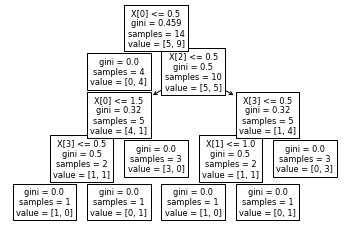

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

x_train = x_train_enc
y_train = y_train_enc

#Crear modelo basado en árbol de decisión
clf = tree.DecisionTreeClassifier()

#Entrenamiento
clf = clf.fit(x_train, y_train)

#Prueba
y_train_pred = clf.predict(x_train)

#Resultados
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

tree.plot_tree(clf)

## Naive Bayes
Fuente: https://scikit-learn.org/stable/modules/naive_bayes.html#

In [11]:
from sklearn.naive_bayes import GaussianNB

# Crear modelo basado en un clasificador naive Bayes (Gaussiano)
clf = GaussianNB()

# Entrenamiento
clf = clf.fit(x_train, y_train)

# Prueba
y_train_pred = clf.predict(x_train)

# Resultados
print("===== TRAINING DATA ======")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))
  

===== TRAINING DATA ======
[[4 1]
 [0 9]]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.90      1.00      0.95         9

    accuracy                           0.93        14
   macro avg       0.95      0.90      0.92        14
weighted avg       0.94      0.93      0.93        14

